# Análisis de las muestras de azúcar

En un restaurante se tiene una fórmula específica para elaborar una cantidad determinada de “agua fresca”, la cual contempla agregar 500 gramos de azúcar. Es claro que resulta de suma importancia añadir exactamente esa cantidad de azúcar para la calidad del agua, ya que, de lo contrario, ésta queda muy dulce o desabrida. Aunque a los cocineros se les ha insistido sobre lo anterior, es frecuente que no pesen el azúcar y la agreguen al tanteo. Al considerar la calidad del agua como un aspecto clave, se decide diseñar un procedimiento a prueba de olvidos: comprar bolsas que contengan 500 gramos de azúcar. Suponga dos marcas de azúcar que cuentan con la presentación de 500 gramos; ahora es necesario decidir qué marca comprar. Con este propósito se pesan 40 bolsas de ambas marcas. Al pesarse arrojan los resultados de la tabla, hallar la media, la mediana y la moda para las dos marcas:

<img src='images/original_data.png'>

In [22]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('datasets/sugar_samples.csv', sep=';')

Luego de cargados los datos se hace una simple inspección de los mismos, monstrando las 6 primeras y últimas observaciones. 

In [24]:
df.head(n=6)

,type_a,type_b
0,503,505
1,502,495
2,500,499
3,499,491
4,502,501
5,491,497


In [25]:
df.tail(n=6)

,type_a,type_b
34,498,496
35,502,496
36,489,498
37,508,500
38,513,492
39,507,494


In [26]:
df.describe().head(10)

,type_a,type_b
count,40.00000,40.000000
mean,502.35000,498.075000
std,7.23081,3.675194
min,484.00000,491.000000
25%,499.00000,496.000000
50%,502.00000,498.000000
75%,507.00000,500.000000
max,515.00000,507.000000


# Análisis exploratorio de datos para la toma de decisiones

Partiremos de una análisis básico observando las medidas de centralidad y dispersión de los datos

In [27]:
columns = ['tipo.azucar', 'media', 'mediana', 'moda', 'desv.estándar', 'coef.variación']

In [28]:
type_a =  ['A', df.type_a.mean(), df.type_a.median(), df.type_a.mode().tolist(), df.type_a.std(), ss.variation(df.type_a)]

In [29]:
type_a

['A', 502.35, 502.0, [502], 7.230810147183743, 0.014212905224767577]

In [30]:
type_b =  ['B', df.type_b.mean(), df.type_b.median(), df.type_b.mode().tolist(), df.type_b.std(), ss.variation(df.type_b)]

In [31]:
type_b

['B',
 498.075,
 498.0,
 [496, 499, 500],
 3.675194046856748,
 0.0072859777154048655]

In [32]:
stats = pd.DataFrame(zip(columns, type_a, type_b), columns=['Estadístico', 'Tipo A', 'Tipo B'], index=None)

In [33]:
stats = stats.iloc[1:, :]

In [34]:
stats.head(n=6)

,Estadístico,Tipo A,Tipo B
1,media,502.35,498.075
2,mediana,502,498
3,moda,[502],"[496, 499, 500]"
4,desv.estándar,7.23081,3.67519
5,coef.variación,0.0142129,0.00728598


# Visualización de datos

## Histograma de frecuencias

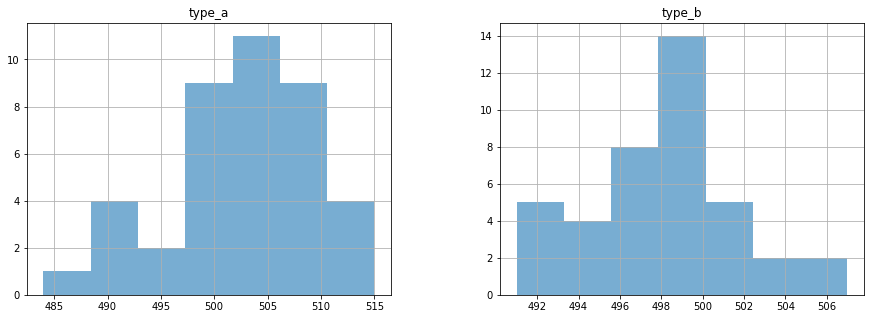

In [35]:
_ = df.hist(bins=7, alpha=0.6, figsize=(15, 5), histtype='bar')

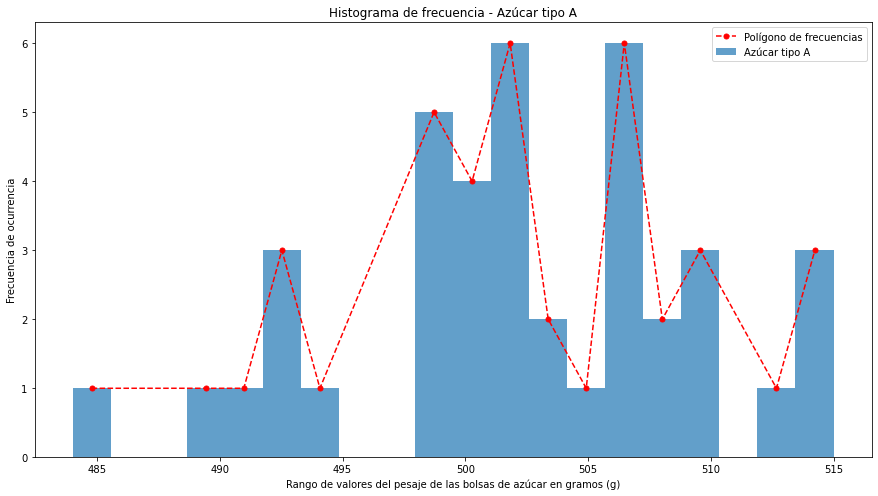

In [36]:
df['type_a'].plot.hist(bins=20, alpha=0.7, figsize=(15, 8), label='Azúcar tipo A',                  
                            title='Histograma de frecuencia - Azúcar tipo A')

s, bins = pd.cut(df['type_a'], bins=20, retbins=True, right=False)

order = s.unique().sort_values(ascending=True)
mid = [(a.left + a.right) / 2 if a.left != -0.01 else a.right / 2 for a in order]
count, division = np.histogram(df['type_a'], bins=20)

count = count[count != 0]

_ = plt.plot(mid, count, color='red', label='Polígono de frecuencias', 
         linestyle='--', marker='.', markersize=10)

_ = plt.xlabel('Rango de valores del pesaje de las bolsas de azúcar en gramos (g)')
_ = plt.ylabel('Frecuencia de ocurrencia')
_ = plt.legend()

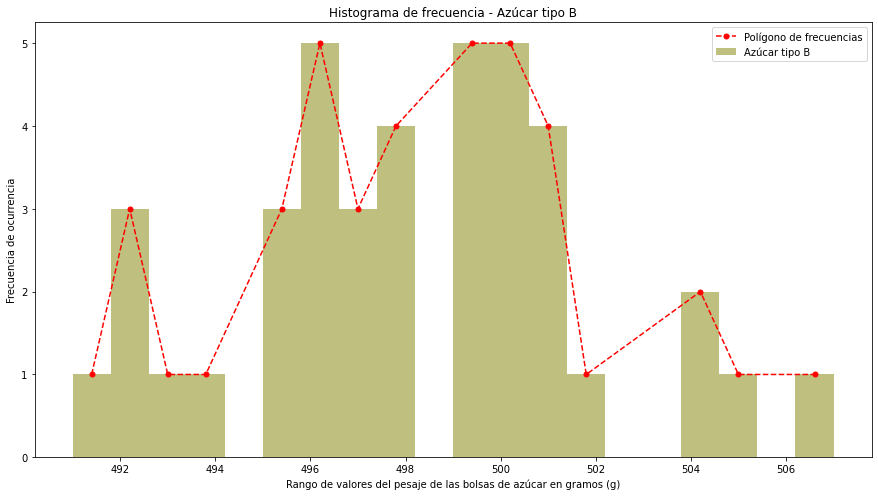

In [37]:
ax = df['type_b'].plot.hist(bins=20, alpha=0.5, figsize=(15, 8), label='Azúcar tipo B', color='olive',                 
                            title='Histograma de frecuencia - Azúcar tipo B')

s, bins = pd.cut(df['type_b'], bins=20, retbins=True, right=False)

order = s.unique().sort_values(ascending=True)
mid = [(a.left + a.right) / 2 if a.left != -0.01 else a.right / 2 for a in order]
count, division = np.histogram(df['type_b'], bins=20)

count = count[count != 0]

_ = plt.plot(mid, count, color='red', label='Polígono de frecuencias', 
         linestyle='--', marker='.', markersize=10)

_ = plt.xlabel('Rango de valores del pesaje de las bolsas de azúcar en gramos (g)')
_ = plt.ylabel('Frecuencia de ocurrencia')
_ = plt.legend()

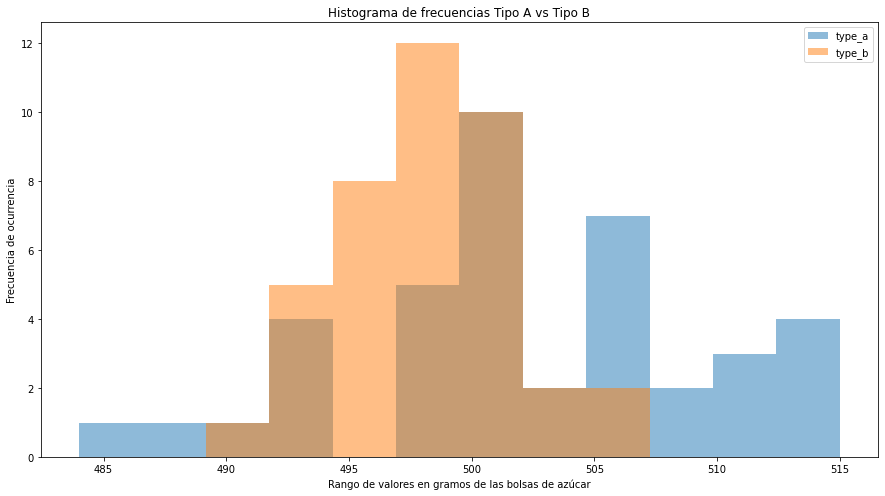

In [38]:
ax = df.plot.hist(bins=12, alpha=0.5, figsize=(15, 8), sharey=True,
                  title='Histograma de frecuencias Tipo A vs Tipo B')

_ = plt.xlabel('Rango de valores en gramos de las bolsas de azúcar')
_ = plt.ylabel('Frecuencia de ocurrencia')


No handles with labels found to put in legend.


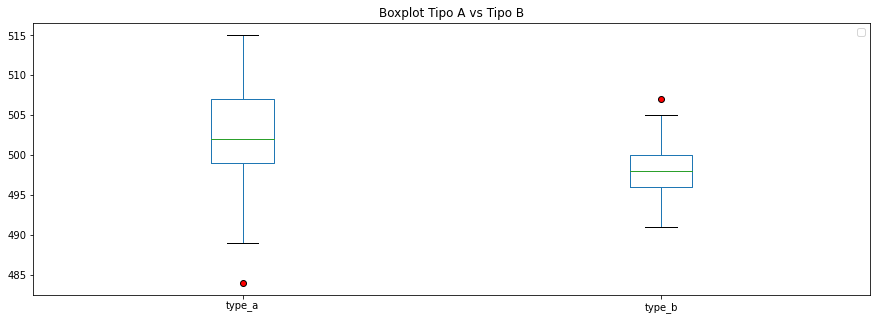

In [44]:
green_diamond = dict(markerfacecolor='r', marker='o')
_ = df.plot(kind='box', figsize=(15, 5), legend=True, flierprops=green_diamond, 
        label=['Azúcar tipo A', 'Azúcar tipo B'], 
        title='Boxplot Tipo A vs Tipo B')
_ = plt.legend()

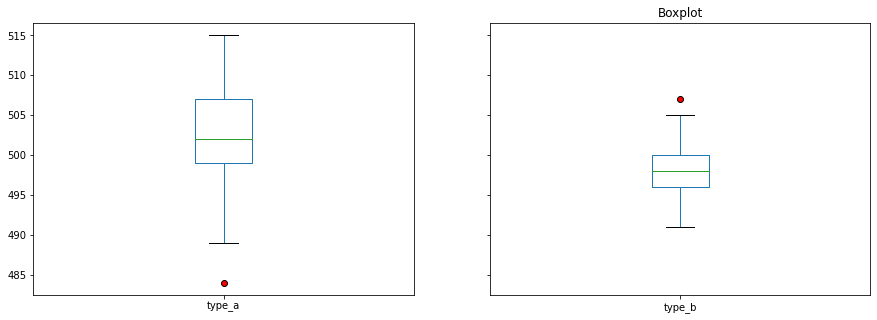

In [40]:
df.plot(kind='box', subplots=True, figsize=(15, 5), sharey=True,
        flierprops=dict(markerfacecolor='r', marker='o'))
_ = plt.title('Boxplot')

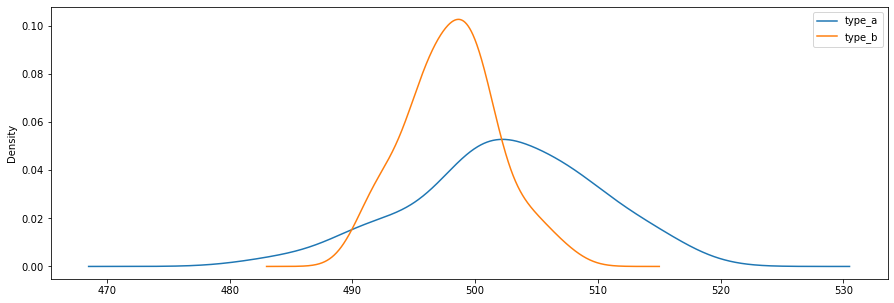

In [41]:
_ = df.plot(kind='kde', figsize=(15, 5))

In [42]:
plt.close('all')

# Referencias y bibiografía

- [SCipy.org](https://www.scipy.org/)
- [Matplotlib Visualization with Python](https://matplotlib.org/)
- [NumPy v1.19.dev0 Manual](https://numpy.org/devdocs/reference/index.html)
- [Pandas - Python Data Analysis Library ](https://pandas.pydata.org/)
